#### 1: Import Libraries and Prepare Data for Prophet

In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the combined and calculated data
df = pd.read_csv('subscriber_analysis_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate the data to the total district level per month
# We use the Kebele_Cumulative_Subscribers column to get the total district size.
# Since this count is identical for every row within the same date/kebele, 
# we first group by Date and Kebele, then sum the max total (which is the total subscribers)
forecasting_data = df.groupby('Date')['Kebele_Cumulative_Subscribers'].max().reset_index()

# Rename columns to Prophet's required format: ds (datestamp) and y (value)
forecasting_data.rename(columns={'Date': 'ds', 'Kebele_Cumulative_Subscribers': 'y'}, inplace=True)

print("Data prepared for Prophet (Total District Cumulative Subscribers):")
print(forecasting_data.tail().to_markdown(index=False))

Data prepared for Prophet (Total District Cumulative Subscribers):
| ds                  |    y |
|:--------------------|-----:|
| 2024-08-01 00:00:00 | 1749 |
| 2024-09-01 00:00:00 | 1855 |
| 2024-10-01 00:00:00 | 1955 |
| 2024-11-01 00:00:00 | 2055 |
| 2024-12-01 00:00:00 | 2132 |


#### 2: Initialize and Fit the Prophet Model

In [3]:
# Initialize the Prophet model
# We set seasonality_mode='additive' which is typical for subscriber counts
# and explicitly enable yearly seasonality which is present in our data.
model = Prophet(
    yearly_seasonality=True, 
    seasonality_mode='additive',
    # We can also set a growth parameter if we anticipate saturation (logistic), 
    # but for 12 months, linear is often sufficient. We'll stick to default (linear) for simplicity.
)

# Fit the model to the 24 months of historical data
model.fit(forecasting_data)

print("Prophet Model fitted successfully on 24 months of historical data.")

13:41:15 - cmdstanpy - INFO - Chain [1] start processing
13:42:02 - cmdstanpy - INFO - Chain [1] done processing


Prophet Model fitted successfully on 24 months of historical data.


#### 3: Generate Future Dates and Make Forecast

In [4]:
# Create a DataFrame for the next 12 months (periods=12) at a monthly start frequency (freq='MS')
future = model.make_future_dataframe(periods=12, freq='MS')

# Generate the forecast
# The forecast object contains predictions (yhat) and confidence intervals (yhat_lower, yhat_upper)
forecast = model.predict(future)

# Select and display the next 12 forecasted months
forecast_12m = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12).round(0)

print("Forecast for the next 12 months (Total District Subscribers):")
print(forecast_12m.to_markdown(index=False))

Forecast for the next 12 months (Total District Subscribers):
| ds                  |   yhat |   yhat_lower |   yhat_upper |
|:--------------------|-------:|-------------:|-------------:|
| 2025-01-01 00:00:00 |   2189 |         2186 |         2192 |
| 2025-02-01 00:00:00 |   2238 |         2229 |         2247 |
| 2025-03-01 00:00:00 |   2407 |         2390 |         2425 |
| 2025-04-01 00:00:00 |   2527 |         2500 |         2555 |
| 2025-05-01 00:00:00 |   2651 |         2612 |         2690 |
| 2025-06-01 00:00:00 |   2790 |         2740 |         2841 |
| 2025-07-01 00:00:00 |   2905 |         2844 |         2973 |
| 2025-08-01 00:00:00 |   3018 |         2942 |         3101 |
| 2025-09-01 00:00:00 |   3124 |         3029 |         3222 |
| 2025-10-01 00:00:00 |   3223 |         3113 |         3337 |
| 2025-11-01 00:00:00 |   3311 |         3184 |         3441 |
| 2025-12-01 00:00:00 |   3383 |         3238 |         3531 |


### 4: Visualize the Forecast and Components

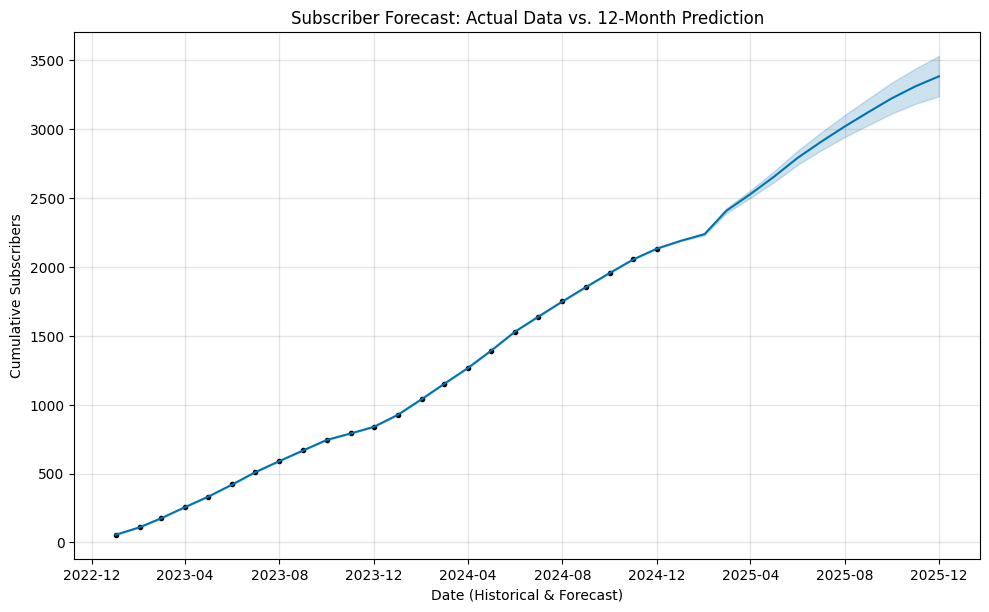

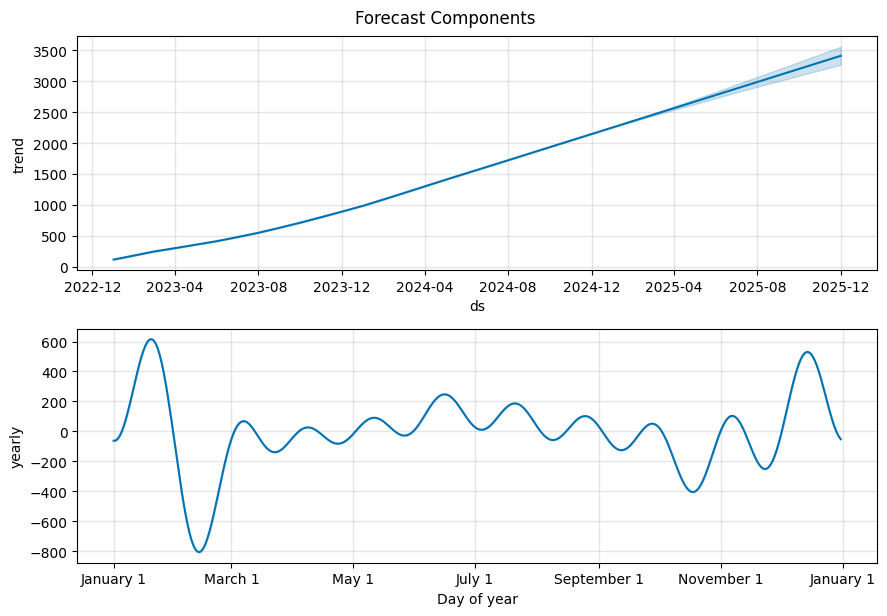

Forecast and component plots generated. These are key visuals for your dashboard.


In [5]:
# Plot the forecast (historical data + future prediction)
fig_forecast = model.plot(forecast)
plt.title('Subscriber Forecast: Actual Data vs. 12-Month Prediction')
plt.xlabel('Date (Historical & Forecast)')
plt.ylabel('Cumulative Subscribers')
plt.show()

# Plot the individual components (Trend, Yearly Seasonality)
fig_components = model.plot_components(forecast)
plt.suptitle('Forecast Components', y=1.02)
plt.show()

print("Forecast and component plots generated. These are key visuals for your dashboard.")

#### 5: Save Figures to PNG Files

In [6]:
# 1. Save the main forecast plot
fig_forecast.savefig(
    '01_Prophet_Forecast_Prediction.png', 
    dpi=300, 
    bbox_inches='tight' # Removes unnecessary whitespace around the figure
)

# 2. Save the forecast components plot
# The component plot is a figure object, so we save it the same way.
fig_components.savefig(
    '02_Prophet_Forecast_Components.png', 
    dpi=300, 
    bbox_inches='tight' 
)

# Crucial step: close the figures to free up memory (especially important if running many plots)
plt.close(fig_forecast)
plt.close(fig_components)


print("\n--- Visualization Saving Complete ---")
print("Two high-resolution PNG files have been saved to your working directory:")
print("- 01_Prophet_Forecast_Prediction.png")
print("- 02_Prophet_Forecast_Components.png")


--- Visualization Saving Complete ---
Two high-resolution PNG files have been saved to your working directory:
- 01_Prophet_Forecast_Prediction.png
- 02_Prophet_Forecast_Components.png
